# Load model

In [1]:
# define the environment path 
import os
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path

# import the models
import cobrakbase
token = 'RBP7R34IILI6IQN5533VVSVUZM6H7YU7'
kbase_api = cobrakbase.KBaseAPI(token)
# model1 = kbase_api.get_from_ws("iML1515",76994)
# model2 = kbase_api.get_from_ws("iSB1139.kb.gf",30650)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


cobrakbase 0.2.8


# Dictionary MSCommFitting model

In [2]:
from datetime import datetime
from time import process_time
from pandas import set_option
set_option("display.max_rows", None)
# import the KBase objects
graphs = [
    {
        'trial':'B4',
        'content': 'biomass',
        # "species": ["ecoli"],
        'experimental_data': True
    },
    {
        'trial':'B4',
        'content': "cpd00029",
    }
]

# run MSCommFitting
%run mscommfitting_dict.py
time1 = process_time()
mscommfit = MSCommFitting()
mscommfit.load_data(#phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                    community_members = {
                        kbase_api.get_from_ws("iML1515",76994): {
                            'name': 'ecoli', 
                            'phenotypes': {#'acetate': kbase_api.get_from_ws('93465/13/1'), 
                                        'malt': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
                            }
                        },
                        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
                            'name': 'pf',
                            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                            }
                        }
                    },
                    base_media = kbase_api.get_from_ws("93465/19/1"),
                    signal_csv_paths = {'path':'Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes (1).xlsx', 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
                    media_conc_path = 'Jeffs_data/media_conc.csv',
                    carbon_conc_series = {'rows': {
                        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                        }},
                    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,5,6,7,8,9,10,11,12]} # 'wells': ['C2', 'G3', 'C12']}
                   # ignore_timesteps = [x for x in range(20,167)],
                    # zip_path='mscomfit.zip'
)

time2 = process_time()
print(datetime.today(), (time2-time1)/60, 'minutes later')
mscommfit.define_problem(parameters={
                                    'v':3,
                                    'cvmin': 100,
                                    'bcv': 100,
                                    'diffpos': 100,
                                    'diffneg': 100
                                    }, 
                         # zip_name='simple_full_community.zip', 
                         final_relative_carbon_conc = 0.1, 
                         metabolites_to_track = ["cpd00179","cpd00029","cpd00136"], 
                         bad_data_timesteps = {'*':'23:'}, zero_start=["cpd00029"])
print(datetime.today())
%time mscommfit.compute(graphs) #, zip_name='simple_full_community.zip')
print('growth Vmax:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the pf measurements.


modelseedpy.core.optlanghelper - WARNING - InputError: The baseTuple of length 5 does not equate that of the additions 1. The lengths will be homogenized to 1.


The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the ecoli measurements.
2022-08-26 00:14:19.843391 0.07552083333333333 minutes later
Done with biomass loop: 0.0 min
[tupVariable(name='g_ecoli_malt-2-B4', bounds=Bounds(lb=0, ub=1000), type='continuous'), tupVariable(name='g_ecoli_malt-1-B4', bounds=Bounds(lb=0, ub=1000), type='continuous')] [ 0.00139277  0.         -0.08179784  0.          0.        ]


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\modelseedpy\core\optlanghelper.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_list[index] = base + additions[index]


ValueError: operands could not be broadcast together with shapes (2,3) (5,) 

### debug the tuple dot product

In [ ]:
variables = [(  # nested iterables represent summation and multiplication in alternating levels
    'g_ecoli_malt-2-B4', 'g_ecoli_malt-1-B4'
)]
coefficients = [0.00162104, 0, -0.08179784, 0, 0]

In [18]:
def tuple_dot_product(baseTup, additions):
    base_length = len(baseTup); addition_length = len(additions)
    if base_length != addition_length:
        minimum = min(base_length, addition_length)
        logger.warning(f"InputError: The baseTuple of length {base_length} does not equate that of the additions {addition_length}."
             f" The lengths will be homogenized to {minimum}.")
        baseTup = baseTup[:minimum] ; additions = additions[:minimum]
        
    new_list = baseTup.copy()
    for index, base in enumerate(new_list):
        # print(base, additions[index])
        if isIterable(additions[index]):
            new_list[index] = base + additions[index]
        else:
            new_list[index] = base + [additions[index]]
    return new_list

def _define_expression(expr:list):
    def define_term(value):
        print(value)
        if isinstance(value, str):
            return {"type":"Symbol", "name": value}
        elif isinstance(value, (float, int)):
            return {"type":"Number", "value": value}

    if len(expr) > 1: # level 2 -> summation
        expression = {"type": "Add", "args": []}
        for term in expr:
            if isIterable(term): # level 3 -> multiplication
                expression["args"].append({"type": "Mul", "args": []})
                if isIterable(term[0]): # level 4 -> summation
                    for added_terms in term:
                        expression["args"][-1]["args"].append({
                                "type": "Add", "args": [define_term(add_val) for add_val in added_terms]})
                else:
                    expression["args"][-1]["args"] = [define_term(val) for val in term]
            else:
                expression["args"].append(define_term(term))
    else: # level 1 -> multiplication
        expression = {"type": "Mul", "args": [define_term(value) for value in expr[0]]}

    return expression  

In [20]:
from pprint import pprint
phenos = ["test1", "test2", "test3", "test4", "test5"]
test_list = [  # names represents the variables in the dictionary format
    [['g_'+pheno+"1", 'g_'+pheno+"2"]] for pheno in phenos
]
# print(test_list)
dot_product = tuple_dot_product(test_list, [1,2,3,4,5])
pprint(dot_product)
print(_define_expression(dot_product))

[[['g_test11', 'g_test12'], 1],
 [['g_test21', 'g_test22'], 2],
 [['g_test31', 'g_test32'], 3],
 [['g_test41', 'g_test42'], 4],
 [['g_test51', 'g_test52'], 5]]
g_test11
g_test12


TypeError: 'int' object is not iterable

In [7]:
x = [1,2,3,4,5]
y = ["test1", "test2", "test3", "test4", "test5"]
z = zip(x,y)
print([t for t in z])

[(1, 'test1'), (2, 'test2'), (3, 'test3'), (4, 'test4'), (5, 'test5')]


### Dictionary version 

In [8]:
from pprint import pprint

def define_term(value):
    if isinstance(value, str):
        return {"type":"Symbol", "name": value}
    elif isinstance(value, (float, int)):
        return {"type":"Number", "value": value}
    print(f"ERROR: The {value} is not known.")

def dot_product(zipped_to_sum, coefficients_for_heuns=None):
    expression = {"operation": "Add", "elements": []}
    for index, (term1, term2) in enumerate(zipped_to_sum):
        if coefficients_for_heuns is not None:
            expression["elements"].append({"operation": "Mul", "elements": [
                {"operation": "Add", "elements": [term1, term2]}, coefficients_for_heuns[index]
            ]})
        else:
            expression["elements"].append({"operation": "Mul", "elements": [term1, term2]})
    return expression

def get_expression_template(expr):
    if isinstance(expr, list):
        return {"type": "Add", "args": []}
    return {"type": expr["operation"], "args": []}

def isnumber(obj):
    try:
        float(obj)
        return True
    except:
        return False

def _define_expression(expr:dict):
        expression = get_expression_template(expr)
        for ele in expr["elements"]:
            if not isnumber(ele) and not isinstance(ele, str):
                arguments = []
                for ele2 in ele["elements"]:
                    if not isnumber(ele2) and not isinstance(ele2, str):
                        print("recursive ele\t\t", type(ele2), ele2)
                        arguments.append(_define_expression(ele2))
                    else:
                        arguments.append(define_term(ele2))
                expression["args"].append(get_expression_template(ele))
                expression["args"][-1]["args"] = arguments
            else:
                expression["args"].append(define_term(ele))
        return expression    

# def dot_product(zipped_to_sum):
#     expression = {"operation": "Add", "elements": []}
#     for (term1, term2) in zipped_to_sum:
#         expression["elements"].append({"operation": "Mul", "elements": [
#             {"operation": "Add", "elements": [define_term(term1), define_term(term2)]}
#         ]})
#     return expression

# pprint(heuns_dot_product(x, zip(x,y)))
pprint(_define_expression(dot_product(zip(x,y), x)))
pprint(_define_expression(dot_product(zip(x,y))))

recursive ele		 <class 'dict'> {'operation': 'Add', 'elements': [1, 'test1']}
recursive ele		 <class 'dict'> {'operation': 'Add', 'elements': [2, 'test2']}
recursive ele		 <class 'dict'> {'operation': 'Add', 'elements': [3, 'test3']}
recursive ele		 <class 'dict'> {'operation': 'Add', 'elements': [4, 'test4']}
recursive ele		 <class 'dict'> {'operation': 'Add', 'elements': [5, 'test5']}
{'args': [{'args': [{'args': [{'type': 'Number', 'value': 1},
                              {'name': 'test1', 'type': 'Symbol'}],
                     'type': 'Add'},
                    {'type': 'Number', 'value': 1}],
           'type': 'Mul'},
          {'args': [{'args': [{'type': 'Number', 'value': 2},
                              {'name': 'test2', 'type': 'Symbol'}],
                     'type': 'Add'},
                    {'type': 'Number', 'value': 2}],
           'type': 'Mul'},
          {'args': [{'args': [{'type': 'Number', 'value': 3},
                              {'name': 'test3', 'type'

# recreate the DCC CommFitting constraint

In [11]:
import numpy as np

def dot_product(zipped_to_sum, coefficients_for_heuns=None):
    elements = []
    for index, (term1, term2) in enumerate(zipped_to_sum):
        if coefficients_for_heuns is not None:
            elements.extend([{"operation": "Mul", "elements": [coefficients_for_heuns[index], term1]},
                                          {"operation": "Mul", "elements": [coefficients_for_heuns[index], term2]}])
        else:
            elements.append({"operation": "Mul", "elements": [term1, term2]})
    return elements


growth_phenos = [[f"future_growth{x}", f"current_growth{x}"] for x in range(5)]
constraint_expresion = {
    "elements": [
        "current_conc",
        {"elements": [-1, "future_conc"],
         "operation": "Mul"},
        *dot_product(growth_phenos, 0.5*np.array([1,2,3,4,5]))
    ],
    "operation": "Add"
}
pprint(_define_expression(constraint_expresion))

{'args': [{'name': 'current_conc', 'type': 'Symbol'},
          {'args': [{'type': 'Number', 'value': -1},
                    {'name': 'future_conc', 'type': 'Symbol'}],
           'type': 'Mul'},
          {'args': [{'type': 'Number', 'value': 0.5},
                    {'name': 'future_growth0', 'type': 'Symbol'}],
           'type': 'Mul'},
          {'args': [{'type': 'Number', 'value': 0.5},
                    {'name': 'current_growth0', 'type': 'Symbol'}],
           'type': 'Mul'},
          {'args': [{'type': 'Number', 'value': 1.0},
                    {'name': 'future_growth1', 'type': 'Symbol'}],
           'type': 'Mul'},
          {'args': [{'type': 'Number', 'value': 1.0},
                    {'name': 'current_growth1', 'type': 'Symbol'}],
           'type': 'Mul'},
          {'args': [{'type': 'Number', 'value': 1.5},
                    {'name': 'future_growth2', 'type': 'Symbol'}],
           'type': 'Mul'},
          {'args': [{'type': 'Number', 'value': 1.5},
      

### Operational constraint from the API method

In [4]:
og_constraint = {
         "name": "dcc_EX_cpd00029_e0-1-B4",
         "expression": {
            "type": "Add",
            "args": [
               {
                  "type": "Mul",
                  "args": [
                     {
                        "type": "Number",
                        "value": 1.0
                     },
                     {
                        "type": "Symbol",
                        "name": "c_EX_cpd00029_e0-1-B4"
                     }
                  ]
               },
               {
                  "type": "Mul",
                  "args": [
                     {
                        "type": "Number",
                        "value": -0.08179783662427487
                     },
                     {
                        "type": "Symbol",
                        "name": "g_pf_acetate-2-B4"
                     }
                  ]
               },
               {
                  "type": "Mul",
                  "args": [
                     {
                        "type": "Number",
                        "value": -0.08179783662427487
                     },
                     {
                        "type": "Symbol",
                        "name": "g_pf_acetate-1-B4"
                     }
                  ]
               },
               {
                  "type": "Mul",
                  "args": [
                     {
                        "type": "Number",
                        "value": 0.03302213447192933
                     },
                     {
                        "type": "Symbol",
                        "name": "g_ecoli_malt-2-B4"
                     }
                  ]
               },
               {
                  "type": "Mul",
                  "args": [
                     {
                        "type": "Number",
                        "value": 0.03302213447192933
                     },
                     {
                        "type": "Symbol",
                        "name": "g_ecoli_malt-1-B4"
                     }
                  ]
               },
               {
                  "type": "Mul",
                  "args": [
                     {
                        "type": "Number",
                        "value": -1.0
                     },
                     {
                        "type": "Symbol",
                        "name": "c_EX_cpd00029_e0-2-B4"
                     }
                  ]
               }
            ]
         },
         "lb": 0,
         "ub": 0,
         "indicator_variable": None,
         "active_when": 1
      }

pprint(og_constraint)

{'active_when': 1,
 'expression': {'args': [{'args': [{'type': 'Number', 'value': 1.0},
                                   {'name': 'c_EX_cpd00029_e0-1-B4',
                                    'type': 'Symbol'}],
                          'type': 'Mul'},
                         {'args': [{'type': 'Number',
                                    'value': -0.08179783662427487},
                                   {'name': 'g_pf_acetate-2-B4',
                                    'type': 'Symbol'}],
                          'type': 'Mul'},
                         {'args': [{'type': 'Number',
                                    'value': -0.08179783662427487},
                                   {'name': 'g_pf_acetate-1-B4',
                                    'type': 'Symbol'}],
                          'type': 'Mul'},
                         {'args': [{'type': 'Number',
                                    'value': 0.03302213447192933},
                                   {'name': 'g_ecoli_m

In [12]:
expression = {
       'args': [{'args': [{'args': [{'type': 'Number', 'value': 1},
                          {'name': 'test1', 'type': 'Symbol'}],
                 'type': 'Add'},
                {'type': 'Number', 'value': 1}],
       'type': 'Mul'}
               ]}
 #      {'args': [{'args': [{'type': 'Number', 'value': 2},
 #                          {'name': 'test2', 'type': 'Symbol'}],
 #                 'type': 'Add'},
 #                {'type': 'Number', 'value': 2}],
 #       'type': 'Mul'},
 #      {'args': [{'args': [{'type': 'Number', 'value': 3},
 #                          {'name': 'test3', 'type': 'Symbol'}],
 #                 'type': 'Add'},
 #                {'type': 'Number', 'value': 3}],
 #       'type': 'Mul'},
 #      {'args': [{'args': [{'type': 'Number', 'value': 4},
 #                          {'name': 'test4', 'type': 'Symbol'}],
 #                 'type': 'Add'},
 #                {'type': 'Number', 'value': 4}],
 #       'type': 'Mul'},
 #      {'args': [{'args': [{'type': 'Number', 'value': 5},
 #                          {'name': 'test5', 'type': 'Symbol'}],
 #                 'type': 'Add'},
 #                {'type': 'Number', 'value': 5}],
 #       'type': 'Mul'}],
 # 'type': 'Add'}

for arg1, content in expression.items():
    for ele in content:
        for arg2, content2 in ele.items():
            if isinstance(content2, list):
                new_ele = {}
                for ele2 in content2:
                    other_elements = [element for element in content2 if element != ele2]
                    if ele2["type"] == "Number":
                        for ele3 in other_elements:
                            if "args" in ele3:
                                for ele4 in ele3["args"]:
                                    if ele4["type"] == "Number": 
                                        
                        
                    print(ele2)

{'args': [{'type': 'Number', 'value': 1}, {'name': 'test1', 'type': 'Symbol'}], 'type': 'Add'}
{'type': 'Number', 'value': 1}


In [1]:
from modelseedpy.core.optlanghelper import OptlangHelper

expr_dict = {"elements": [
                {"elements": [
                    {"elements": [
                        {"elements": ["test1", 5], "operation": "Mul"}, 
                    4], "operation":"Add"}, 
                "test2"], "operation": "Mul"},
                3], "operation":"Add"}

OptlangHelper.add_constraint("test constraint", (1,10), expr_dict)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


expr			 {'elements': [{'elements': [{'elements': [{'elements': ['test1', 5], 'operation': 'Mul'}, 4], 'operation': 'Add'}, 'test2'], 'operation': 'Mul'}, 3], 'operation': 'Add'}
iterable ele		 {'elements': [{'elements': [{'elements': ['test1', 5], 'operation': 'Mul'}, 4], 'operation': 'Add'}, 'test2'], 'operation': 'Mul'}
recursive ele		 <class 'dict'> {'elements': [{'elements': ['test1', 5], 'operation': 'Mul'}, 4], 'operation': 'Add'}
expr			 {'elements': [{'elements': ['test1', 5], 'operation': 'Mul'}, 4], 'operation': 'Add'}
iterable ele		 {'elements': ['test1', 5], 'operation': 'Mul'}
pure ele		 4
pure ele		 3


{'name': 'test_constraint',
 'expression': {'type': 'Add',
  'args': [{'type': 'Mul',
    'args': [{'type': 'Add',
      'args': [{'type': 'Mul',
        'args': [{'type': 'Symbol', 'name': 'test1'},
         {'type': 'Number', 'value': 5}]},
       {'type': 'Number', 'value': 4}]},
     {'type': 'Symbol', 'name': 'test2'}]},
   {'type': 'Number', 'value': 3}]},
 'lb': 1,
 'ub': 10,
 'indicator_variable': None,
 'active_when': 1}

In [4]:
from pprint import pprint
pprint({'expression': {'type': 'Add',
  'args': [{'type': 'Mul',
    'args': [{'type': 'Add',
      'args': [{'type': 'Mul',
        'args': [{'type': 'Symbol', 'name': 'test1'},
         {'type': 'Number', 'value': 5}]},
       {'type': 'Number', 'value': 4}]},
     {'type': 'Symbol', 'name': 'test2'}]},
   {'type': 'Number', 'value': 3}]}})

{'expression': {'args': [{'args': [{'args': [{'args': [{'name': 'test1',
                                                        'type': 'Symbol'},
                                                       {'type': 'Number',
                                                        'value': 5}],
                                              'type': 'Mul'},
                                             {'type': 'Number', 'value': 4}],
                                    'type': 'Add'},
                                   {'name': 'test2', 'type': 'Symbol'}],
                          'type': 'Mul'},
                         {'type': 'Number', 'value': 3}],
                'type': 'Add'}}


In [104]:
from collections import namedtuple
from typing import Iterable

def define_term(value):
    if isinstance(value, str):
        return {"type":"Symbol", "name": value}
    elif isinstance(value, (float, int)):
        return {"type":"Number", "value": value}
    print(f"ERROR: The {value} is not known.")

def get_expression_template(expr):
    return {"type": expr["operation"], "args": []}
    
def isnumber(obj):
    try:
        float(obj)
        return True
    except:
        return False

def expression_construction(expr):
    print("expr\t\t\t", expr)
    expression = get_expression_template(expr)
    for ele in expr["elements"]:
        # print("ele\t\t\t", ele)
        if not isnumber(ele) and not isinstance(ele, str):
            print("iterable ele\t\t", ele)
            arguments = []
            for ele2 in ele["elements"]:
                if not isnumber(ele2) and not isinstance(ele2, str):
                    print("recursive ele\t\t", type(ele2), ele2)
                    arguments.append(expression_construction(ele2))
                else:
                    arguments.append(define_term(ele2))
            expression["args"].append(get_expression_template(ele))
            expression["args"][-1]["args"] = arguments
            # expression["args"] = arguments
        else:
            print("pure ele\t\t", ele)
            expression["args"].append(define_term(ele))
    return expression

expr_dict = {"elements": [
                {"elements": [
                    {"elements": [
                        {"elements": ["test1", 5], "operation": "Mul"}, 
                    4], "operation":"Add"}, 
                "test2"], "operation": "Mul"},
                3], "operation":"Add"}

# expr_dict = {"elements": [{"elements": ["test2", 4], "operation": "Mul"}, 8], "operation": "Add"}
        
pprint(expression_construction(expr_dict))

expr			 {'elements': [{'elements': [{'elements': [{'elements': ['test1', 5], 'operation': 'Mul'}, 4], 'operation': 'Add'}, 'test2'], 'operation': 'Mul'}, 3], 'operation': 'Add'}
iterable ele		 {'elements': [{'elements': [{'elements': ['test1', 5], 'operation': 'Mul'}, 4], 'operation': 'Add'}, 'test2'], 'operation': 'Mul'}
recursive ele		 <class 'dict'> {'elements': [{'elements': ['test1', 5], 'operation': 'Mul'}, 4], 'operation': 'Add'}
expr			 {'elements': [{'elements': ['test1', 5], 'operation': 'Mul'}, 4], 'operation': 'Add'}
iterable ele		 {'elements': ['test1', 5], 'operation': 'Mul'}
pure ele		 4
pure ele		 3
{'args': [{'args': [{'args': [{'args': [{'name': 'test1', 'type': 'Symbol'},
                                        {'type': 'Number', 'value': 5}],
                               'type': 'Mul'},
                              {'type': 'Number', 'value': 4}],
                     'type': 'Add'},
                    {'name': 'test2', 'type': 'Symbol'}],
           'type': 'Mu

### NamedTuple version 

In [78]:
from collections import namedtuple
from typing import Iterable

def define_term(value):
    if isinstance(value, str):
        return {"type":"Symbol", "name": value}
    elif isinstance(value, (float, int)):
        return {"type":"Number", "value": value}

def get_expression_template(expr, inverse=False):
    if expr.operation == "multiplication" and not inverse or expr.operation == "summation" and inverse:
        return {"type": "Mul", "args": []}
    else:
        return {"type": "Add", "args": []}
    
def isnumber(obj):
    try:
        float(obj)
        return True
    except:
        return False

def expression_construction(expr):
    print("expr\t\t\t", expr)
    expression = get_expression_template(expr)
    for ele in expr.elements:
        print("ele\t\t\t", ele)
        if not isinstance(ele, (str, float, int)):
            print("iterable ele\t\t", ele)
            arguemnts = []
            for ele2 in ele.elements:
                if not isnumber(ele2):
                    print("recursive ele\t\t", type(ele2), ele2)
                    arguments.append(expression_construction(ele2))
                else:
                    arguments.append(define_term(ele2))
            expression["args"].append(get_expression_template(ele, True))
            expression["args"][-1]["args"] = arguments
        else:
            print("pure ele\t\t", ele)
            expression["args"].append(ele)
    return expression

tupOperation = namedtuple("tupOperation", ("elements", "operation"), defaults=([], "summation"))
expr = tupOperation([
            tupOperation([
                tupOperation([
                    "test1", 5
                ], "summation"), 4
            ], "multiplication"), "test2"
        ])
        
pprint(expression_construction(expr))

expr			 tupOperation(elements=[tupOperation(elements=[tupOperation(elements=['test1', 5], operation='summation'), 4], operation='multiplication'), 'test2'], operation='summation')
ele			 tupOperation(elements=[tupOperation(elements=['test1', 5], operation='summation'), 4], operation='multiplication')
iterable ele		 tupOperation(elements=[tupOperation(elements=['test1', 5], operation='summation'), 4], operation='multiplication')
recursive ele		 <class '__main__.tupOperation'> tupOperation(elements=['test1', 5], operation='summation')
expr			 tupOperation(elements=['test1', 5], operation='summation')
ele			 test1
pure ele		 test1
ele			 5
pure ele		 5
ele			 test2
pure ele		 test2
{'args': [{'args': [None,
                    {'type': 'Number', 'value': 4},
                    {'args': ['test1', 5], 'type': 'Add'},
                    {'args': ['test1', 5], 'type': 'Add'},
                    {'args': ['test1', 5], 'type': 'Add'},
                    {'args': ['test1', 5], 'type': 'Add'}

In [41]:
from collections import namedtuple
from typing import Iterable

def define_term(value):
    if isinstance(value, str):
        return {"type":"Symbol", "name": value}
    elif isinstance(value, (float, int)):
        return {"type":"Number", "value": value}
        
        
tupOperation = namedtuple("tupOperation", ("elements", "operation"), defaults=([], "summation"))
expr = tupOperation([
    tupOperation([
        tupOperation(["test1", 5], "summation"), 4
    ], "multiplication"), 
    "test2"
])
expression = {"type": "Add", "args": []}
for ele in expr.elements:
    if not isinstance(ele, (str, float, int)):
        if ele.operation == "multiplication":
            arguments = [define_term(ele2) for ele2 in ele.elements]
            # print(arguments)
            expression["args"].append({"type": "Mul", "args": arguments})
    else:
        expression["args"].append(ele)
        
pprint(expression)

{'args': [{'args': [None, {'type': 'Number', 'value': 4}], 'type': 'Mul'},
          'test2'],
 'type': 'Add'}


In [ ]:
def _define_expression(expr:list):
    def define_term(value):
        print(value)
        if isinstance(value, str):
            return {"type":"Symbol", "name": value}
        elif isinstance(value, (float, int)):
            return {"type":"Number", "value": value}

    if len(expr) == 1:
        return {"type": "Mul", "args": [define_term(value) for value in expr[0]]}
    
    expression = {"type": "Add", "args": []}
    summation = False
    while len(expr) > 1:
        for term in expr:
            if isIterable(term): # level 3 -> multiplication
                
                if summation:
                    expression["args"].append({"type": "Mul", "args": []})
                else:
                    expression["args"].append({"type": "Mul", "args": []})
            

    if len(expr) > 1: # level 2 -> summation
        
        for term in expr:
            if isIterable(term): # level 3 -> multiplication
                expression["args"].append({"type": "Mul", "args": []})
                if isIterable(term[0]): # level 4 -> summation
                    for added_terms in term:
                        expression["args"][-1]["args"].append({
                                "type": "Add", "args": [define_term(add_val) for add_val in added_terms]})
                else:
                    expression["args"][-1]["args"] = [define_term(val) for val in term]
            else:
                expression["args"].append(define_term(term))

    return expression  

# Example simulation with the dictionary definition

In [1]:
# define the environment path 
import os
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path

# import the models
import cobrakbase
token = 'RBP7R34IILI6IQN5533VVSVUZM6H7YU7'
kbase_api = cobrakbase.KBaseAPI(token)
# model1 = kbase_api.get_from_ws("iML1515",76994)
# model2 = kbase_api.get_from_ws("iSB1139.kb.gf",30650)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


cobrakbase 0.2.8


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the pf measurements.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C

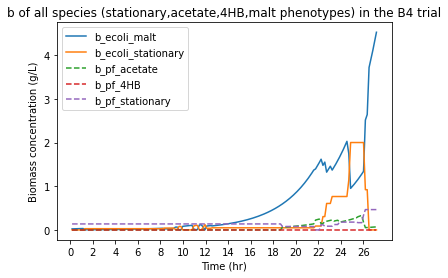

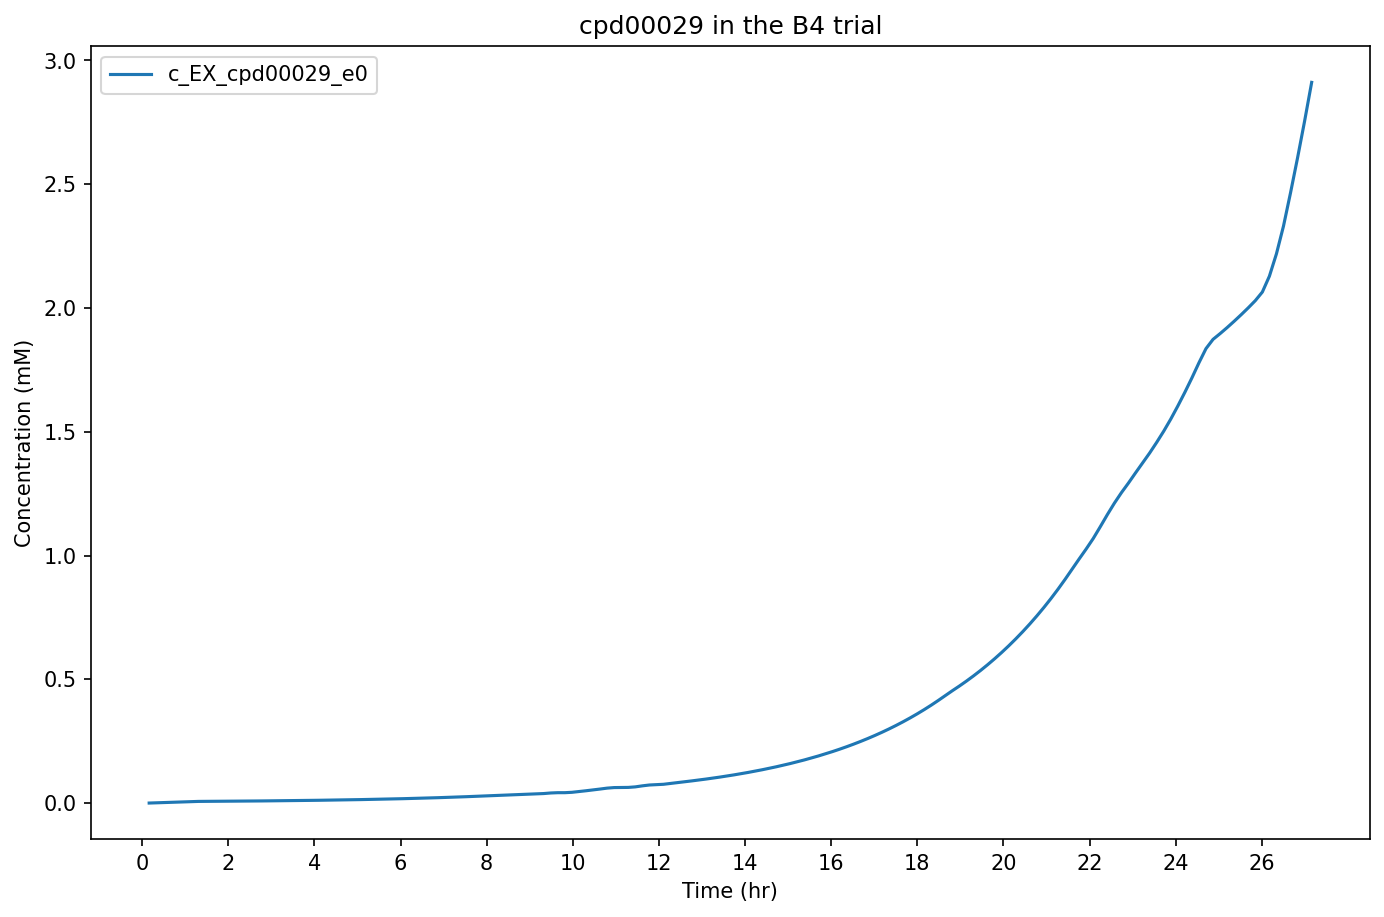

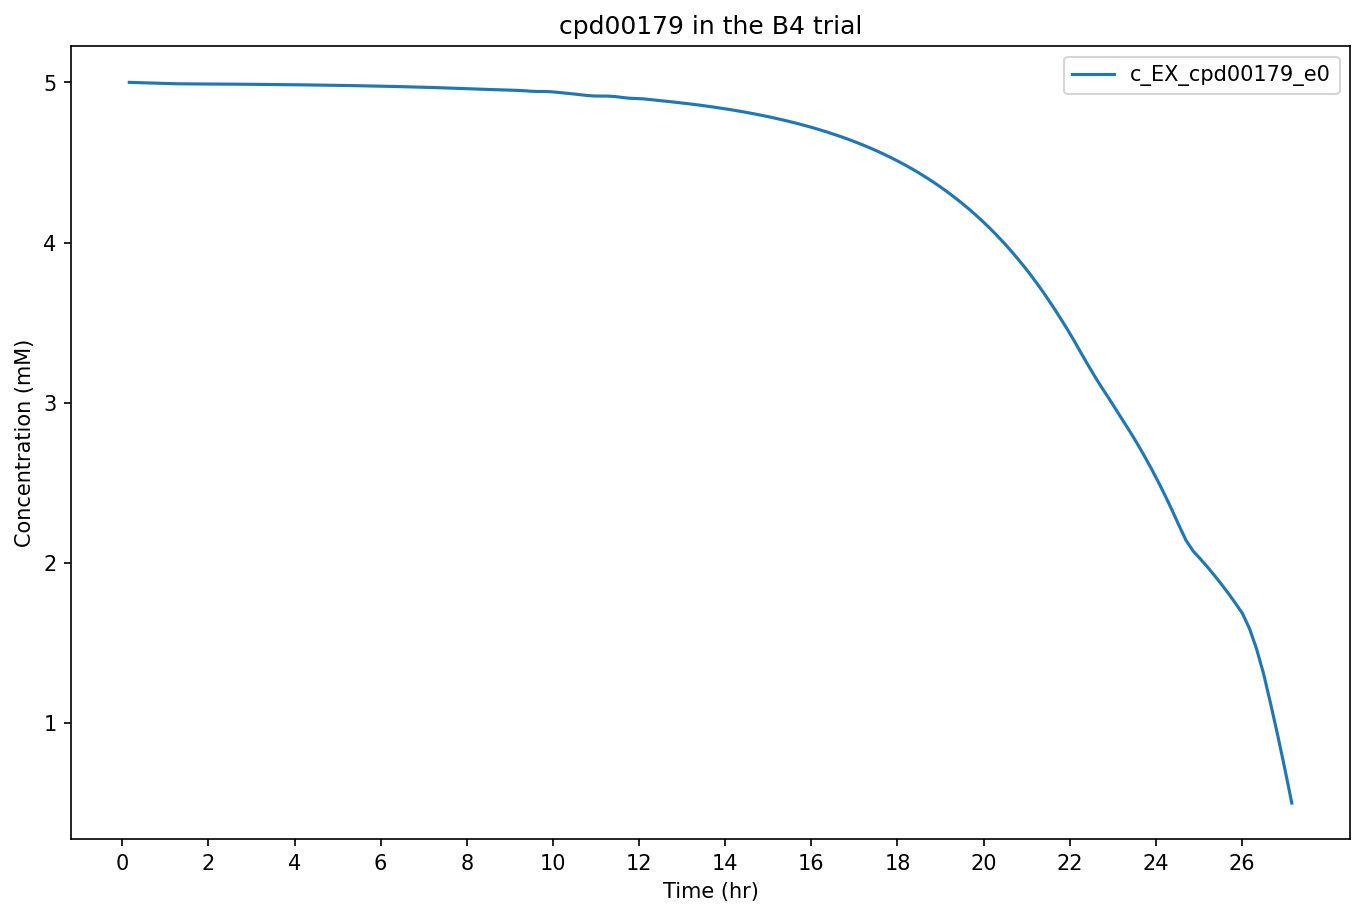

In [2]:
from datetime import datetime
from time import process_time
from pandas import set_option
set_option("display.max_rows", None)
# import the KBase objects
graphs = [
    {
        'trial':'B4',
        'content': 'biomass',
        # "species": ["ecoli"],
        'experimental_data': True
    },
    {
        'trial':'B4',
        'content': "cpd00029",
    },
    {
        'trial':'B4',
        'content': "cpd00179",
    }
]

# run MSCommFitting
%run mscommfitting_dict.py
time1 = process_time()
mscommfit = MSCommFitting()
mscommfit.load_data(#phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                    community_members = {
                        kbase_api.get_from_ws("iML1515",76994): {
                            'name': 'ecoli', 
                            'phenotypes': {#'acetate': kbase_api.get_from_ws('93465/13/1'), 
                                        'malt': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
                            }
                        },
                        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
                            'name': 'pf',
                            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                            }
                        }
                    },
                    base_media = kbase_api.get_from_ws("93465/19/1"),
                    signal_csv_paths = {'path':'Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes (1).xlsx', 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
                    media_conc_path = 'Jeffs_data/media_conc.csv',
                    carbon_conc_series = {'rows': {
                        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                        }},
                    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,5,6,7,8,9,10,11,12]}, # 'wells': ['C2', 'G3', 'C12']}
                   # ignore_timesteps = [x for x in range(20,167)],
                    # zip_path='mscomfit.zip'
                   )
time2 = process_time()
print(datetime.today(), (time2-time1)/60, 'minutes later')
mscommfit.define_problem(parameters={
                                    'v':.3,
                                    'cvmin': 100,
                                    'bcv': 100,
                                    'diffpos': 100,
                                    'diffneg': 100
                                    }, 
                         # zip_name='simple_full_community.zip', 
                         final_relative_carbon_conc = 0.1, 
                         metabolites_to_track = ["cpd00179","cpd00029","cpd00136"], 
                         bad_data_timesteps = {'*':'23:'}, zero_start=["cpd00029"])
print(datetime.today())
%time mscommfit.compute(graphs) #, zip_name='simple_full_community.zip')
print('growth Vmax:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

In [ ]:
0 <= 
    c_EX_cpd00029_e0-1-B4 
    - c_EX_cpd00029_e0-2-B4 
    + 0.00162103680708521*g_ecoli_malt-1-B4 
    + 0.00162103680708521*g_ecoli_malt-2-B4 
    + 0.0*g_ecoli_stationary-1-B4 
    + 0.0*g_ecoli_stationary-2-B4 
    + 0.0*g_pf_4HB-1-B4 
    + 0.0*g_pf_4HB-2-B4 
    - 0.0817978366242749*g_pf_acetate-1-B4 
    - 0.0817978366242749*g_pf_acetate-2-B4 
    + 0.0*g_pf_stationary-1-B4 
    + 0.0*g_pf_stationary-2-B4 
<= 0

In [ ]:
0 <= 
    c_EX_cpd00029_e0-1-B4 
    - c_EX_cpd00029_e0-2-B4 
    + (g_ecoli_malt-1-B4 + g_ecoli_malt-2-B4)*0.00139277176420164 
    + (g_ecoli_stationary-1-B4 + g_ecoli_stationary-2-B4)*0.0 
    + (g_pf_4HB-1-B4 + g_pf_4HB-2-B4)*0.0 
    + (g_pf_acetate-1-B4 + g_pf_acetate-2-B4)*(-0.0817978366242749) 
    + (g_pf_stationary-1-B4 + g_pf_stationary-2-B4)*0.0 
<= 0

In [ ]:
{'elements': ['mRuby__bio-165-B4', {'operation': 'Add', 'elements': [{'operation': 'Mul', 'elements': [-1, 1, 'b_ecoli_malt-165-B4']}, 
                                                                     {'operation': 'Mul', 'elements': [-1, 
                                                                                                       {'elements': ['g_ecoli_malt-166-B4', 'g_ecoli_malt-165-B4'],
                                                                                                        'operation': 'Mul'},
                                                                                                       1, 'cvf_ecoli_malt-165-B4']}, 
                                                                     {'operation': 'Mul', 'elements': [1, 'cvt_ecoli_malt-165-B4']}, 
                                                                     {'operation': 'Mul', 'elements': [-1, 1, 'b_ecoli_stationary-165-B4']}, 
                                                                     {'operation': 'Mul', 'elements': [-1, 0, 'b_pf_acetate-165-B4']}, 
                                                                     {'operation': 'Mul', 'elements': [-1, 0, 'b_pf_4HB-165-B4']}, 
                                                                     {'operation': 'Mul', 'elements': [-1, 0, 'b_pf_stationary-165-B4']}
                                                                    ]
                                   }, 
              'mRuby__diffneg-165-B4', 
              {'elements': [-1, 'mRuby__diffpos-165-B4'], 'operation': 'Mul'}],
 'operation': 'Add'} 
{'elements': [-1, 'mRuby__diffpos-165-B4'], 'operation': 'Mul'}

In [3]:
pprint({'operation': 'Mul', 'elements': [-1, 1, 'b_pf_4HB-1-B4']}, {'operation': 'Mul', 'elements': [-1, 1, 'b_pf_stationary-1-B4']}]}, 'Raw_OD(590)__diffneg-1-B4', 
       {'elements': [-1, 'Raw_OD(590)__diffpos-1-B4'], 'operation': 'Mul'}], 'operation': 'Add'})

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (1496156049.py, line 1)